In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
df=pd.read_csv("CO2 Emissions_Canada.csv")

In [4]:
df.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [5]:
df.tail(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7375,VOLVO,S90 T6 AWD,MID-SIZE,2.0,4,AS8,Z,11.3,7.5,9.6,29,223
7376,VOLVO,V60 T5,STATION WAGON - SMALL,2.0,4,AS8,Z,10.5,7.1,8.9,32,208
7377,VOLVO,V60 T6 AWD,STATION WAGON - SMALL,2.0,4,AS8,Z,11.0,7.4,9.4,30,219
7378,VOLVO,V60 CC T5 AWD,STATION WAGON - SMALL,2.0,4,AS8,Z,10.8,7.7,9.4,30,220
7379,VOLVO,XC40 T4 AWD,SUV - SMALL,2.0,4,AS8,X,10.2,7.5,9.0,31,210
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


In [6]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [7]:
cdf=df[['Engine Size(L)','Cylinders','Fuel Consumption Comb (mpg)','CO2 Emissions(g/km)']]

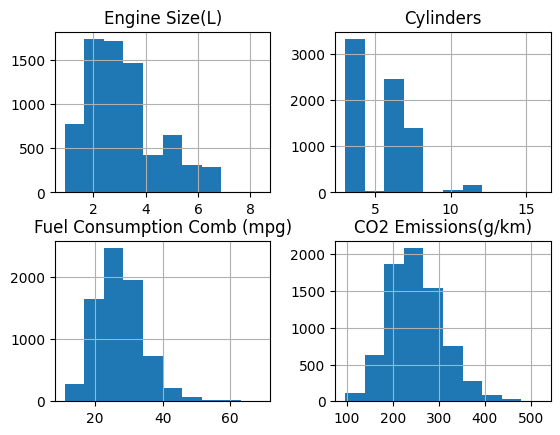

In [8]:
viz=cdf[['Engine Size(L)','Cylinders','Fuel Consumption Comb (mpg)','CO2 Emissions(g/km)']]
viz.hist()
plt.show()

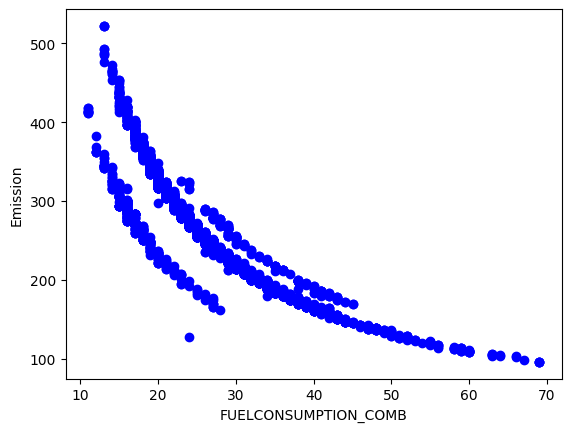

In [9]:
plt.scatter(cdf['Fuel Consumption Comb (mpg)'], cdf['CO2 Emissions(g/km)'], color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

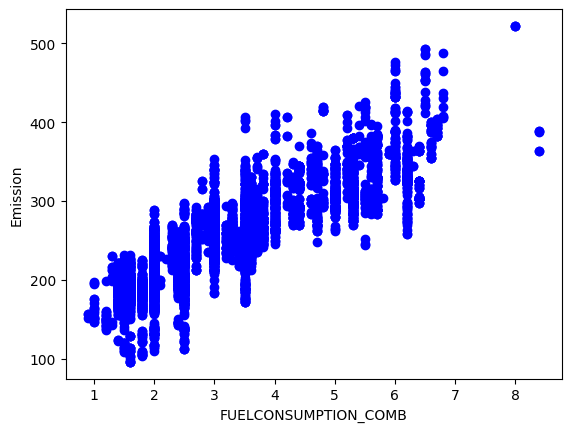

In [10]:
plt.scatter(cdf['Engine Size(L)'], cdf['CO2 Emissions(g/km)'], color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

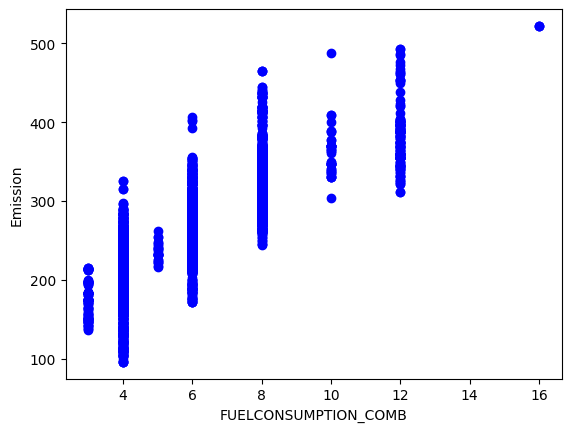

In [11]:
plt.scatter(cdf['Cylinders'], cdf['CO2 Emissions(g/km)'], color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

In [12]:
msk= np.random.rand(len(df))<0.8
train=cdf[msk]
test=cdf[~msk]

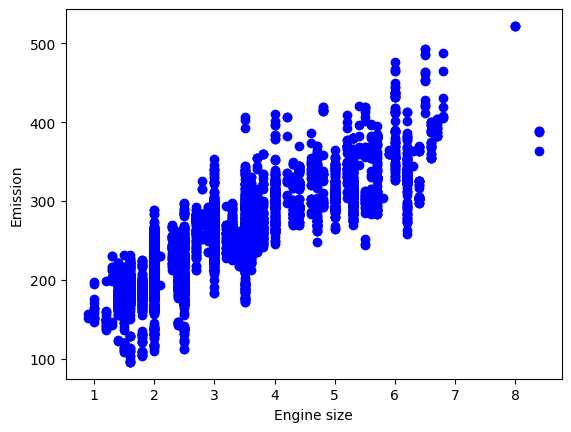

In [13]:
plt.scatter(train['Engine Size(L)'], train['CO2 Emissions(g/km)'], color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()


In [14]:
from sklearn import linear_model
regr =linear_model.LinearRegression()
train_x=np.asanyarray(train['Engine Size(L)'])
train_y=np.asanyarray(train['CO2 Emissions(g/km)'])
regr.fit(train_x.reshape(-1,1),train_y)
print('coefficent', regr.coef_)
print('intercept', regr.intercept_)

coefficent [36.67749178]
intercept 134.58219635313282


Text(0, 0.5, 'Emission')

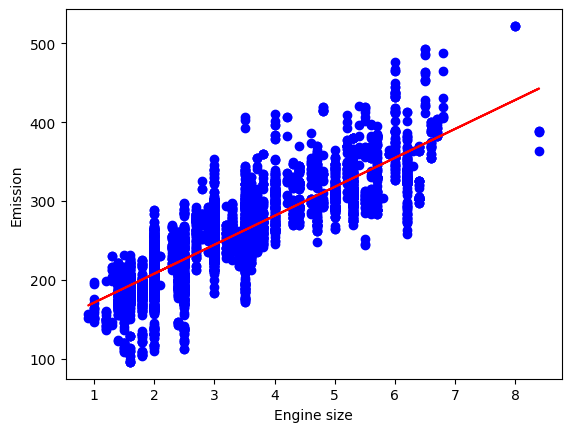

In [15]:
plt.scatter(train['Engine Size(L)'], train['CO2 Emissions(g/km)'],  color='blue')
plt.plot(train_x, regr.coef_[0]*train_x + regr.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [16]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test['Engine Size(L)']).reshape(-1,1)
test_y = np.asanyarray(test['CO2 Emissions(g/km)'])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 22.95
Residual sum of squares (MSE): 903.08
R2-score: 0.73


In [17]:
print(regr.score(train_x.reshape(-1,1),train_y))

0.722035761329193


In [18]:
import pickle
with open('model.pkl','wb') as file:
 pickle.dump(regr,file)



In [19]:
import pickle
model=pickle.load(open('model.pkl','rb'))
print(model.predict([[70.1]]))

[2705.67437037]


In [20]:
with open('model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Now use the model for prediction
sample_features = np.array([[2.0]])  # Example feature for prediction
prediction = model.predict(sample_features)
print(prediction)


[207.93717992]
